# Multidimensional Array Exercise

In this exercise, you will apply the principles of using multidimensional arrays to estimate global mean temperature from a gridded dataset, accounting for the fact that grid cells become smaller at the poles.

In a dataset with evenly spaced latitude and longitude values, the meridians converge at the poles, making the cells smaller.  The area of the cells is proportional to the cosine of the latitude $\theta$ (in radians):

$$ \Delta A = R_{\oplus}^2 \Delta \theta \Delta \phi \cdot \cos(\theta) $$
$$ \Delta A \propto \cos(\theta)$$

Therefore, when calculating the global average of a quantity (like temperature), the values need to be weighted by $\cos(\theta)$.

**Goal**: correctly calculate a timeseries of global mean temperature from the dataset below

Instructions:

1. execute the cell below to download the dataset (this is the one we used to make sound in the first class)
1. the cell includes code to extract the latitude values (in degrees; `lat`) and the temperature field `temp_3d` as numpy arrays
1. calculate and plot a timeseries of global mean temperature, using the $cos(\theta)$ weighting

In [51]:
""" Read in the data """
import xarray as xr

# set the year we want to download
year = 1983 
# set the URL for the NCEP/DOE Reanalysis 2 data file
url = f"https://psl.noaa.gov/thredds/fileServer/Datasets/ncep.reanalysis2/gaussian_grid/air.2m.gauss.{year}.nc"

# set the name of the file we want to download to
output_file = f"air.2m.gauss.{year}.nc"

# download the data file
# NOTE: the use of ! at the beginning of the line indicates that this is a shell command, not python code -- though it does use some python code.  How, why?
# check first if the file exists; don't re-download if it does

import os
if not os.path.exists(output_file):
    ! curl --output {output_file} {url}

# (a side note for anyone familiar with xarray: you might ask why I don't use xarray to directly open the file from the URL (or the related OpenDAP URL)?  The reason is that it takes several minutes to open this 55 MB file, whereas directly downloading it takes only a couple seconds!)

# open the dataset using xarray
temp_ds = xr.open_dataset(output_file, chunks = -1)

# get the latitude and temperature values as numpy arrays
lat = temp_ds.lat.values
temp_3d = temp_ds.air.values

Steps to get global average temperature vs. time 

1. Calculate area of each cell and wight each cell based on lat value (cos(lat))
2. Calculate weighted global avera temp (temp_column.mean)
3. Plot against number of years

In [52]:
import numpy as np

# convert lat to radians
lat_rad = np.deg2rad(lat)

# calculate the cosine of the latitude values
cos_lat = np.cos(lat_rad)

# weight the temperature values by the cosine of the latitude values
# reshape the lat values to be a 4D array for broadcasting
temp_weighted = temp_3d * cos_lat.reshape(1, 1, -1, 1) #[np.newaxis, :, np.newaxis]

# cos_lat[np.newaxis, :, np.newaxis].shape
# cos_lat.reshape(1, 1, -1, 1).shape
# temp_weighted.shape

# calculate the global mean temperature
global_weighted_mean_temp = np.mean(temp_weighted, axis=(2,3))



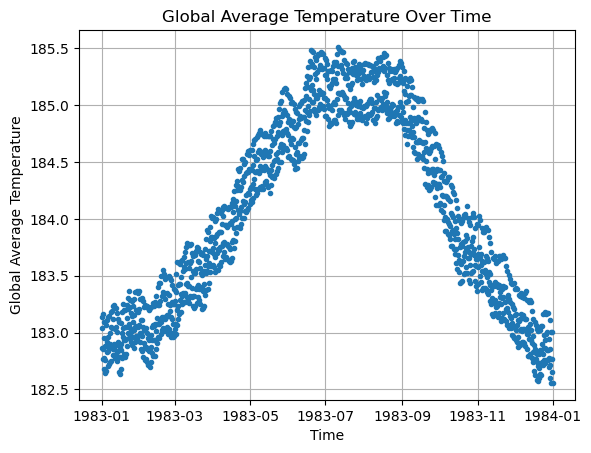

In [64]:
# Plot time vs. global average temperature
import matplotlib.pyplot as plt

plt.plot(temp_ds.time, global_weighted_mean_temp, marker='.', linewidth=0)
plt.xlabel('Time')
plt.ylabel('Global Average Temperature')
plt.title('Global Average Temperature Over Time')
plt.grid(True)
plt.show()